/home/whq/anaconda3/envs/tfe/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


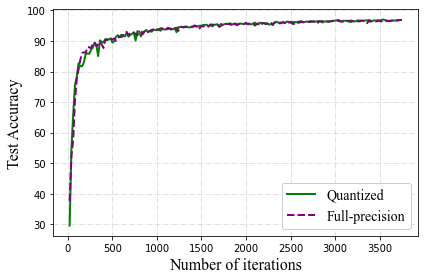

log/SecureML/test_acc.pdf


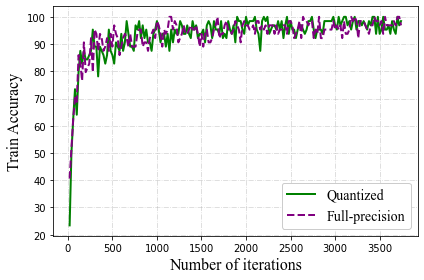

log/SecureML/train_acc.pdf


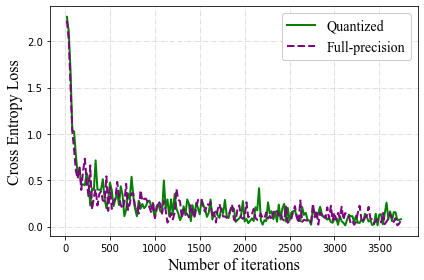

log/SecureML/loss.pdf


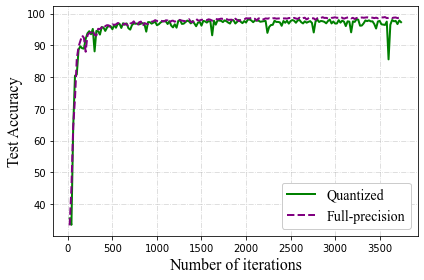

log/MiniONN/test_acc.pdf


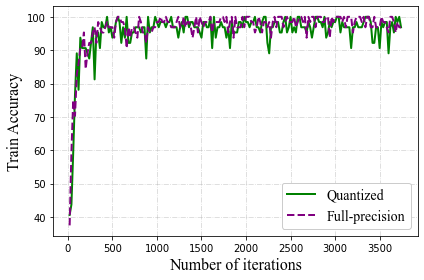

log/MiniONN/train_acc.pdf


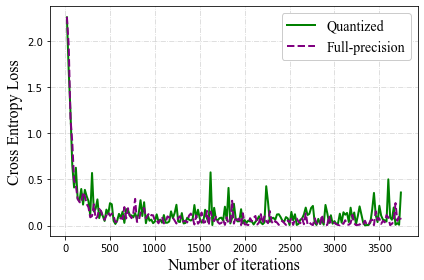

log/MiniONN/loss.pdf


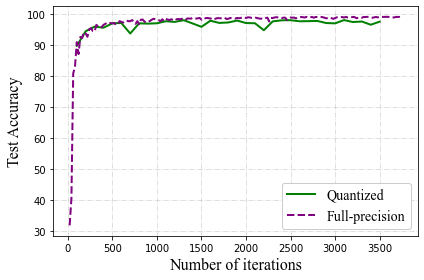

log/LeNet/test_acc.pdf


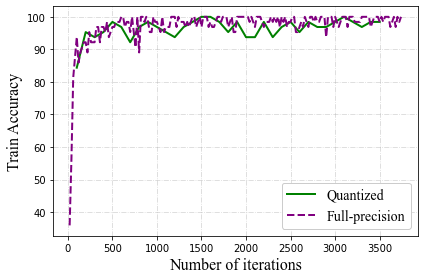

log/LeNet/train_acc.pdf


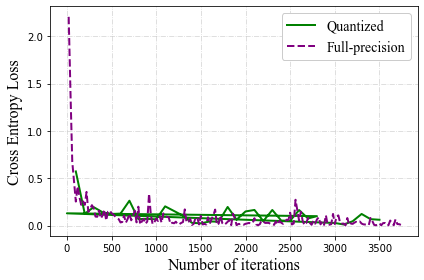

log/LeNet/loss.pdf


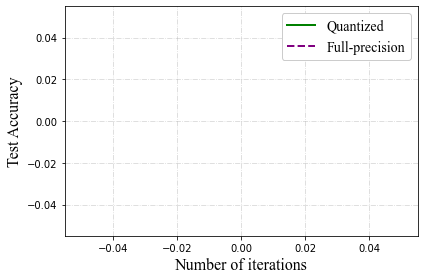

log/AlexNet/test_acc.pdf


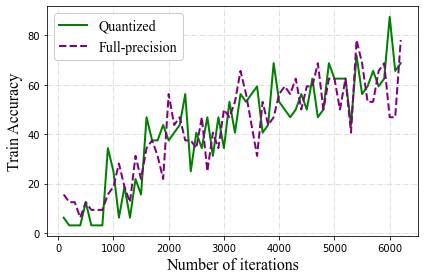

log/AlexNet/train_acc.pdf


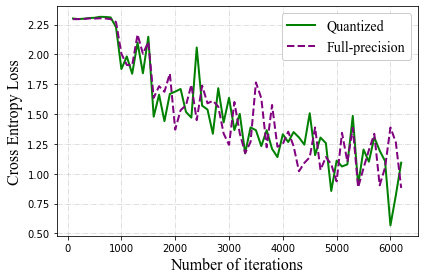

log/AlexNet/loss.pdf


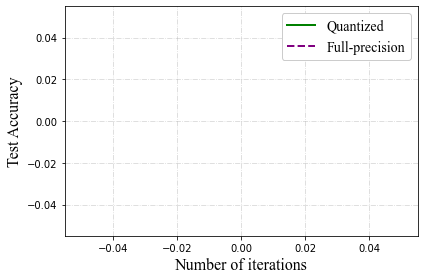

log/VGG16/test_acc.pdf


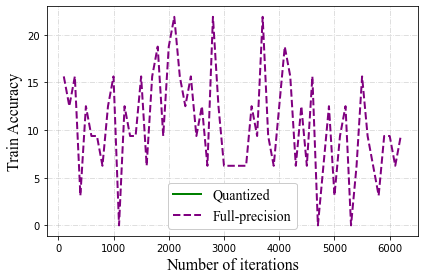

log/VGG16/train_acc.pdf


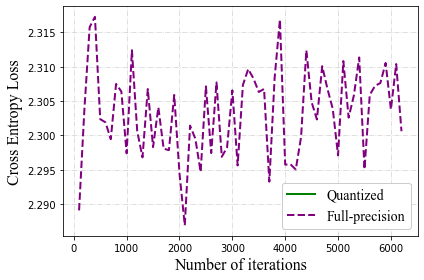

log/VGG16/loss.pdf


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os

# quant = True

models = ['SecureML', 'MiniONN', 'LeNet', 'AlexNet', 'VGG16']
metrics = ['test_acc', 'train_acc', 'loss']

font_family1 = {'family': 'Times New Roman', 'size': 16}
font_family2 = {'family': 'Times New Roman', 'size': 14}

# model_name = "SecureML"
interval = 5

def draw_acc_fig(x_quant, y_quant, x_full, y_full, name, base_path):
    x_quant = x_quant[slice(0, len(x_quant), interval)]
    y_quant = y_quant[slice(0, len(y_quant), interval)]
    x_full = x_full[slice(0, len(x_full), interval)]
    y_full = y_full[slice(0, len(y_full), interval)]
    plt.cla()
    # fig = plt.figure()
    ax = plt.subplot()
    plt.plot(x_quant, y_quant, color='g', linestyle='-', lw=2)
    plt.plot(x_full, y_full, color='purple', linestyle='--', lw=2)
    plt.grid(True, alpha=0.5, linestyle='-.')
    # plt.yscale('log')
    plt.xlabel('Number of iterations', fontdict=font_family1)

    if name == 'test_acc':
        ylabel = 'Test Accuracy'
    elif name == 'train_acc':
        ylabel = 'Train Accuracy'
    elif name == 'loss':
        ylabel = 'Cross Entropy Loss'

    plt.ylabel(ylabel, fontdict=font_family1)
    # plt.title(name, fontdict=font_family)
    # plt.xticks(x)
    plt.legend(['Quantized', 'Full-precision'], framealpha=1, prop=font_family2)
    plt.tight_layout()
    plt.show()
    print(base_path + name + '.pdf')
    # plt.savefig(base_path + name + '.pdf')

def load_data(quant):
    x = []
    y = []
    sufix = 'quant' if quant else 'full-precision'
    base_path = 'log/' + model + '/' + sufix + "/"
    file_path = base_path + metric + '.txt'
    if os.path.exists(file_path):
        file = open(file_path, 'r')
        for line in file:
            x.append(int(line.split('\t')[0]))
            y.append(float(line.split('\t')[1]))
    return x, y

if __name__ == '__main__':
    for model in models:
            for metric in metrics:
                x_quant, y_quant = load_data(True)
                x_full, y_full = load_data(False)
                draw_acc_fig(x_quant, y_quant, x_full, y_full, metric, 'log/' + model + '/')
                # draw_acc_fig(, metric, 'log/' + model + '/')
